In [3]:
#%pip install matplotlib

In [1]:
#https://docs.scipy.org/doc/scipy-0.16.1/reference/stats.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv('C:/Users/praf6/OneDrive - Universidade Federal do Cariri - UFCA/Drive/UFCA/Ensino/CRAN R_aulas/kaggleFiles/data/titanic/train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


******** Frequency: Survived versus Pclass ********


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


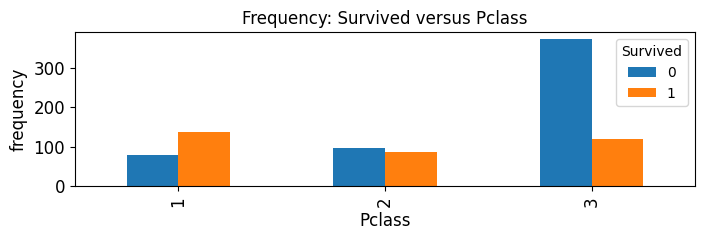

In [2]:
def qualiQualiVariablesAnalysis (varName1, varName2):
    SQ_tb = pd.crosstab(index=data[varName1], columns=data[varName2])#, normalize = "index")#, margins = True
    title = "Frequency: " + varName2  + " versus " + varName1 
    print("******** " + title + " ********")
    display(SQ_tb)
    Stacked = SQ_tb.plot(kind="bar",figsize=(8,2),stacked=False,title=title,fontsize=12)
    Stacked.set_ylabel("frequency",fontsize=12)
    Stacked.set_xlabel(varName1,fontsize=12)
    return (SQ_tb)

contingency = qualiQualiVariablesAnalysis('Pclass', 'Survived')

In [4]:
# Chi-square test of independence. 
#H0: There is no association (the variables are independent)
#H1: There is association (the variables are dependent)
statistic, pValue, degreesOfFreedom, expected = stats.chi2_contingency(contingency)
print('Pearson Chi-squared statistic =', statistic)#Pearson's Chisquared Statistic
print('Pearson Chi-squared pValue =', pValue)
print('Pearson Chi-squared degreesOfFreedom =', degreesOfFreedom)
print('Pearson Chi-squared expected =', expected)
print(expected<=5)#there is no expected value lesser or equal than 5...
                  # in these cases, this test is not so reliable...
                  #for alpha=5%, as pValue >= alpha, I do not reject H0
alpha = .05
if(pValue>=alpha):
    print('I do not reject H0, i.e. I decide there is no association between the variables.')
else:
    print('I do reject H0, i.e. I decide there is association between the variables.')

Pearson Chi-squared statistic = 102.88898875696056
Pearson Chi-squared pValue = 4.549251711298793e-23
Pearson Chi-squared degreesOfFreedom = 2
Pearson Chi-squared expected = [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]
[[False False]
 [False False]
 [False False]]
I do reject H0, i.e. I decide there is association between the variables.


In [5]:
1/4.549251711298793e-23

2.1981637057284395e+22

******** Frequency: Sex versus Survived ********


Sex,female,male
Survived,,
0,81,468
1,233,109


Fisher statistic = 0.08096731594585672
Fisher statistic pValue = 6.463921564583144e-60
expected number of samples to achieve the actual result:  1.5470484751534723e+59


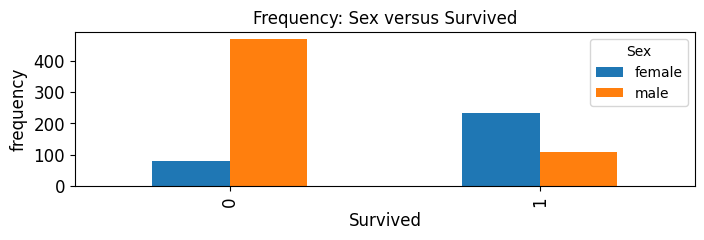

In [6]:
# Nas situações de haver valores esperados menores que 5, é melhor recorrer ao teste exato de Fisher,
# ao invés do de Pearson:
# Python em si só trablaha com o teste de Fisher para tabelas 2X2:
contSS = qualiQualiVariablesAnalysis('Survived', 'Sex')
# Fisher test of independence. 
#H0: There is no association
#H1: There is association
statistic, pValue = stats.fisher_exact(contSS)
print('Fisher statistic =', statistic)#Fisher's Statistic
print('Fisher statistic pValue =', pValue)#With alpha = 5%, H0 is rejected
print('expected number of samples to achieve the actual result: ', str(1/pValue))

In [8]:
#in the case of contingency tables with dimensions bigger than 2X2, 
#it seems R must be used:
#https://stackoverflow.com/questions/25368284/fishers-exact-test-for-bigger-than-2-by-2-contingency-table
#%pip install rpy2

In [9]:
# import rpy2.robjects.numpy2ri
# from rpy2.robjects.packages import importr
# rpy2.robjects.numpy2ri.activate()

# stats = importr('stats')
# # m = np.array([[4,4],[4,5],[10,6]])
# res = stats.fisher_test(contSS)
# print ('p-value: {}'.format(res[0][0]))

In [10]:
#correspondence analysis
#https://www.kaggle.com/code/jiagengchang/heart-disease-multiple-correspondence-analysis/notebook
# %pip install prince

******** Frequency: Embarked versus Survived ********


Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


AttributeError: 'CA' object has no attribute 'plot_coordinates'

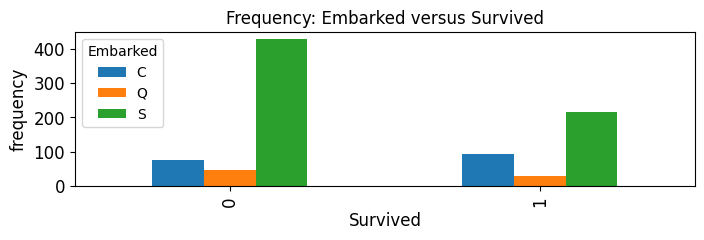

In [7]:
import prince
crossTb = qualiQualiVariablesAnalysis('Survived', 'Embarked')
# instantiate MCA class
ca = prince.CA(n_components = 2)
# get principal components
ca.fit(crossTb)
# project categories onto mca copmonents
# implicitly calls transform(X)
# what we want to see is for the points belonging to the same color to be as far apart as possible, for all colors
ax = ca.plot_coordinates(crossTb, figsize=(4, 8))
# ax.get_figure().savefig('MCAplot.svg')

In [ ]:
#Correspondence Analysis .. to be continued
def associationPlot_qualitativeVariables(distFrequencia):
  #CALCULANDO OS RESÍDUOS:
  #e_ij = ni. X n.j / n..#valor esperado para a célula da linha i e coluna j (supondo independência - H0)
  #PE_ij = e_ij/n..#probabilidade de ocorrer a conjunção da célula ij sob H0 (independência)
  #PO_ij = o_ij/n..#frequência relativa de ocorrer a conjunção da célula ij
  #residuo_ij = (PO_ij - PE_ij)/sqrt(PE_ij)
  n = distFrequencia.sum()#Tamanho amostral
  PO = distFrequencia/n#distribuição conjunta relativa observada
  pi = PO.sum(axis=0)#frequência relativa total por linha (marginal da variável-linha)
  pj = PO.sum(axis=1)#frequência relativa total por coluna (marginal da variável-coluna)
  rD = np.diag(1./np.sqrt(pi))#inversa da matriz diagonal da marginal da variável-linha em relação à raiz de pi
  cD = np.diag(1./np.sqrt(pj))#matriz diagonal da marginal da variável-coluna em relação à raiz de pj
  PE = pi*pj.T#distribuição conjunta esperada (sob H0: independência)
  residuals = rD* (PO-PE) *cD#
  print(residuals)
  dimnames(residuals) = dimnames(distFrequencia)
  # View(residuals)

  # dec = svd(x = distFrequencia)#singular value decomposition
  dec = svd(x = residuals)#singular value decomposition
  eigenvalues = dec$d^2
  totalSum = sum(eigenvalues)
  eigenvalues = eigenvalues / totalSum
  PearsonChisquaredStatistic = n..*totalSum
  U = dec$u; S = diag(dec$d); V = dec$v#t(U)U = t(V)V = I (matriz identidade)
  rownames(U) = rownames(distFrequencia)
  rownames(V) = colnames(distFrequencia)
  minDim = min(dim(distFrequencia))
  colnames(U) = paste("Concept", 1:minDim, sep="_")
  colnames(V) = paste("Concept", 1:minDim, sep="_")
  # View(U);View(V);
  k=2#number of components/concepts/eigenvectors to considerer
  Uk = U[,1:k]#the representation of the terms in the k-dimensional space
  Sk = S[1:k, 1:k]#the strength of the components
  Vk = V[, 1:k]#the representation of the documents in the k-dimensional space (easy to store for query search)
  # View(Uk); View(Vk)

  # PLOTING
  # concept space of documents
  library(ggplot2)
  # concept space of terms and documents
  termsLabels = rownames(Uk)
  docsLabels = rownames(Vk)
  df = data.frame(  Concept_1 = c(Uk[,1], Vk[,1])
                    , Concept_2 = c(Uk[,2], Vk[,2])
                    , type = c(  rep("Desfecho", nrow(distFrequencia))
                                 , rep("Dose", ncol(distFrequencia)))
                    , label = c(termsLabels, docsLabels))
  rownames(df)
  # View(df)
  gg =
  ggplot(data= df, aes(x=Concept_1, y=Concept_2, colour = type)) +
    xlab(paste("Concept 1 (", round(100*eigenvalues[1], 1), "%)", sep="")) +
    ylab(paste("Concept 2 (", round(100*eigenvalues[2], 1), "%)", sep="")) +
    geom_point(show.legend = FALSE)+
    directlabels::geom_dl(aes(label = label), method = "smart.grid")
  # ggsave(gg)
  print(gg)

  ret = list(residuals = residuals
             , PearsonChisquaredStatistic = PearsonChisquaredStatistic
             , n.. = n.., PO = PO, PE = PE
             , pi. = pi., p.j = p.j, eigenvalues = eigenvalues
             , eigenvectors = list(U = U, V = V))
  return(ret)

# apqv = associationPlot_qualitativeVariables(distFrequencia)
# apqv$residuals
# apqv$PearsonChisquaredStatistic
# apqv$eigenvalues

#2º caso
# distFrequencia2 =
#   matrix(data =c( 50, 3, 2, 0
#                 , 1,  6, 10, 50
#                 , 2,  1, 50, 90)
#          , nrow = 3, byrow = TRUE
#          , dimnames =
#            list(c("Sem sintomas", "Mal-estar", "Aborto")
#                 , c("0 mg de Y", "50 mg de Y", "100 mg de Y", "500 mg de Y")))
# View(distFrequencia2)
# associationPlot_qualitativeVariables(distFrequencia2)



SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (3952124507.py, line 17)